<a href="https://colab.research.google.com/github/silviapihu/magistritoo/blob/master/classificationmakro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Erinevate visualiseerimis-, kalibreerimis-, võrdlusmeetodite katsetused
https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
https://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html#sphx-glr-auto-examples-calibration-plot-compare-calibration-py
https://stats.stackexchange.com/questions/336404/feature-importance-for-breast-cancer-random-forests-vs-logistic-regression
https://www.dummies.com/programming/big-data/data-science/data-science-how-to-create-interactions-between-variables-with-python/



In [1]:

from google.colab import files
uploaded = files.upload()

Saving koos.csv to koos.csv


In [2]:
import pandas as pd
import numpy as np



In [3]:
import io
koos = pd.read_csv(io.BytesIO(uploaded['koos.csv']))

In [20]:
koos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5017 entries, 0 to 5016
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kood             5017 non-null   object 
 1   Valim            5017 non-null   int64  
 2   Vanus            5017 non-null   float64
 3   vanusyle40       5017 non-null   int64  
 4   Kaal             5012 non-null   float64
 5   KMI              5012 non-null   float64
 6   KMIyle25         4994 non-null   float64
 7   DM_sugul         5017 non-null   int64  
 8   PCOS             5017 non-null   int64  
 9   suur_laps_varem  5017 non-null   int64  
 10  paastusuhkur     4952 non-null   float64
 11  polyhydramnion   5017 non-null   int64  
 12  gdm_riskiryhm    5017 non-null   int64  
 13  GDM              5017 non-null   int64  
 14  GA               5017 non-null   int64  
 15  synnitus         5017 non-null   int64  
 16  sugu             5011 non-null   float64
 17  synnikaal     

In [22]:
makro1 = koos[['DM_sugul','Vanus', 'sugu', 'KMI', 'suur_laps_varem', 'paastusuhkur', 'polyhydramnion', 'PCOS', 'gdm_riskiryhm', 'Makrosoomia']]

In [35]:
makro2 = koos[['DM_sugul','Vanus', 'KMI', 'suur_laps_varem', 'paastusuhkur', 'PCOS', 'Makrosoomia']]

In [60]:
makro1=makro1.dropna()
makro1.describe()

,DM_sugul,Vanus,sugu,KMI,suur_laps_varem,paastusuhkur,polyhydramnion,PCOS,gdm_riskiryhm,Makrosoomia
count,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000
mean,0.093908,29.302545,1.481886,23.564588,0.021656,0.154422,0.019834,0.011739,0.990285,0.114956
std,0.291730,5.323188,0.499722,4.547652,0.145571,0.361390,0.139444,0.107718,1.034969,0.319002
min,0.000000,14.000000,1.000000,14.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.963039,1.000000,20.478267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,1.000000,22.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,33.000000,2.000000,25.559329,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,1.000000,47.000000,2.000000,53.200000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


tasakaalustamata andmed. kasutan positiivse ms väärtusega ridade paljundamist ja negatiivsete vähendamist

In [62]:
from collections import Counter
from imblearn.combine import SMOTEENN
y = makro1.Makrosoomia
X = makro1.drop('Makrosoomia', 1)
# summarize class distribution
print(Counter(y))
# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.5, random_state=1)
# fit and apply the transform
X_over, y_over = sample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 4373, 1: 568})
Counter({0: 2657, 1: 1077})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [63]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_over)

In [64]:
X_scaled.shape

(3734, 9)

Mudelite võrdlus

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.772109 (0.318447)
LDA: 0.783522 (0.302411)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.610130 (0.142405)
DT: 0.442616 (0.258707)
GNB: 0.794339 (0.285341)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.823437 (0.257892)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.494777 (0.236130)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

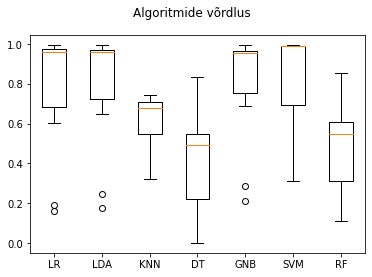

In [50]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
seed = 1
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_scaled, y_over, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algoritmide võrdlus')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.savefig('mudelid.png')
files.download('mudelid.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


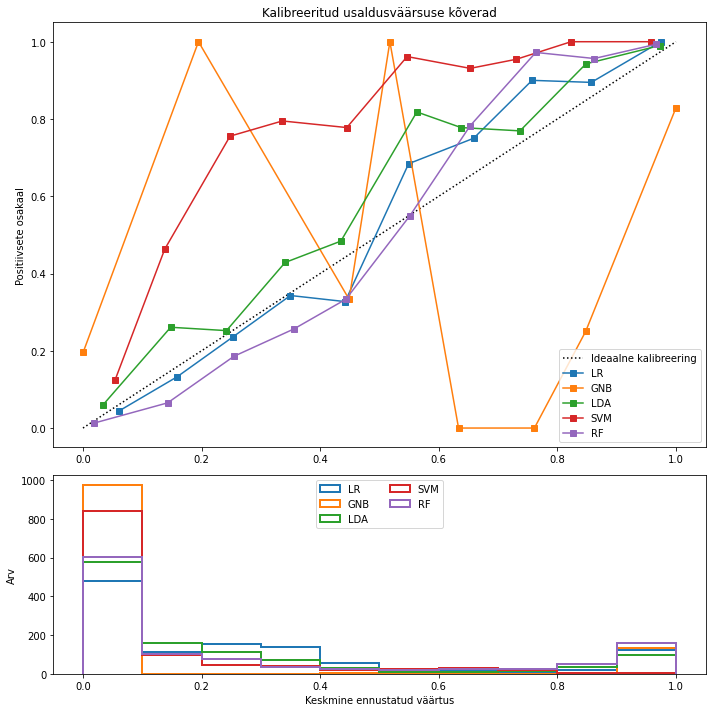

In [72]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_over,test_size=0.3, random_state=1)
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
svc = SVC()
rfc = RandomForestClassifier()


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Ideaalne kalibreering")
for clf, name in [(lr, 'LR'),
                  (gnb, 'GNB'),
                  (lda, 'LDA'),
                  (svc, 'SVM'),
                  (rfc, 'RF')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Positiivsete osakaal")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Kalibreeritud usaldusväärsuse kõverad')

ax2.set_xlabel("Keskmine ennustatud väärtus")
ax2.set_ylabel("Arv")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
logi=LogisticRegression()
params = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_lr = GridSearchCV(estimator = logi,
                        param_grid = params,
                        scoring = 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)

grid_lr.fit(X_train, y_train)
print(grid_lr.score(X_test, y_test))
print(grid_lr.best_estimator_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 596 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 902 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.2min finished


0.8871619620805289
LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


Võrkotsing

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
forest = RandomForestClassifier(random_state = 1)
params = { 'n_estimators' : [100, 300, 500, 800, 1200],
'max_depth' : [5, 8, 15, 25, 30],
'min_samples_split' : [2, 5, 10, 20],
'min_samples_leaf' : [1, 2, 4, 7]}
grid_rf=GridSearchCV(estimator = forest,
                        param_grid = params,
                        scoring = 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)

grid_rf.fit(X_train, y_train)
print(grid_rf.score(X_test, y_test))
print(grid_rf.best_estimator_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 42.5min finished


0.9819246252471008
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


Tunnuste olulisus

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

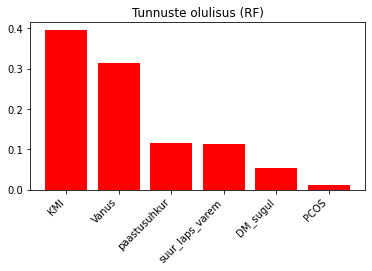

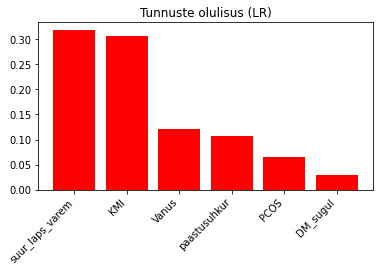

In [52]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
clf.fit(X_scaled, y_over)
coefs = clf.feature_importances_

indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Tunnuste olulisus (RF)")
plt.bar(range(6), coefs[indices[:6]],
       color="r", align="center")
plt.xticks(range(6), makro2.columns[indices[:6]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

clf = LogisticRegression(C=0.0018329807108324356, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False) 
clf.fit(X_scaled, y_over)
coefs = np.abs(clf.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Tunnuste olulisus (LR)")
plt.bar(range(6), coefs[indices[:6]],
       color="r", align="center")
plt.xticks(range(6), makro2.columns[indices[:6]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

plt.ion(); 
plt.savefig('tunnused.png')
files.download('tunnused.png')
plt.show()

Kriteeriumide arvutus

In [74]:
!pip install pycm
from pycm import *

model=LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
model.fit(X_train, y_train)
cm = ConfusionMatrix(y_test, model.predict(X_test))
print(cm)

Predict   0         1         
Actual
0         804       10        

1         135       172       





Overall Statistics : 

95% CI                                                            (0.85101,0.8903)
ACC Macro                                                         0.87065
ARI                                                               0.50298
AUNP                                                              0.77399
AUNU                                                              0.77399
Bangdiwala B                                                      0.82417
Bennett S                                                         0.7413
CBA                                                               0.70825
CSI                                                               0.67463
Chi-Squared                                                       492.21383
Chi-Squared DF                                                    1
Conditional Entropy                                  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [70]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

model.fit(X_train, y_train)
cm = ConfusionMatrix(y_test, model.predict(X_test))
print(cm)

Predict   0         1         
Actual
0         796       18        

1         42        265       





Overall Statistics : 

95% CI                                                            (0.9333,0.95965)
ACC Macro                                                         0.94648
ARI                                                               0.78655
AUNP                                                              0.92054
AUNU                                                              0.92054
Bangdiwala B                                                      0.91525
Bennett S                                                         0.89295
CBA                                                               0.90654
CSI                                                               0.86368
Chi-Squared                                                       835.6255
Chi-Squared DF                                                    1
Conditional Entropy                                  

Rekursiivne tunnuste ärajätmine
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html


Optimaalne tunnuste arv: 1
[5 2 1 4 3 6]


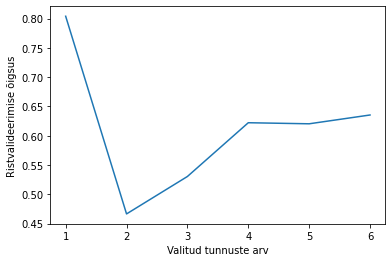

In [55]:

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X_scaled, y_over)

print("Optimaalne tunnuste arv: %d" % rfecv.n_features_)
print(rfecv.ranking_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Valitud tunnuste arv")
plt.ylabel("Ristvalideerimise õigsus")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly = PolynomialFeatures()
X_transformed=poly.fit_transform(X_scaled)
print(X_transformed.shape)

(3734, 55)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
gdmA =gdm.drop('GDM', 1)
polyX = pd.DataFrame(X_scaled, columns=gdmA.columns)
print(df.describe())
lr = LogisticRegression(C=0.0018329807108324356, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


baseline = np.mean(cross_val_score(lr, df, y_over, scoring ='roc_auc', cv=crossvalidation, n_jobs=1))
improvements=[baseline]

for feature_A in gdmA.columns:
    polyX[feature_A+'^2'] = polyX[feature_A]**2
    improvements.append(np.mean(cross_val_score(lr, polyX, y_over, scoring='roc_auc', cv=crossvalidation, n_jobs=1)))
    for feature_B in gdmA.columns:
        if feature_A > feature_B:
            polyX[feature_A+'*'+feature_B] = polyX[feature_A] * polyX[feature_B]
            improvements.append(np.mean(cross_val_score(lr, polyX, y_over, scoring='roc_auc', cv=crossvalidation, n_jobs=1)))
            
print (polyX.info())
print ('ROC_AUC %.3f' % abs(np.mean(cross_val_score(lr, polyX, y_over, scoring='roc_auc', cv=crossvalidation, n_jobs=1))))

           DM_sugul         Vanus  ...          PCOS  interaction
count  5.045000e+03  5.045000e+03  ...  5.045000e+03  5045.000000
mean  -8.921176e-16  5.373446e-15  ... -7.194190e-15     0.068542
std    1.000099e+00  1.000099e+00  ...  1.000099e+00     1.170256
min   -3.770377e-01 -2.947749e+00  ... -1.503083e-01    -9.368407
25%   -3.770377e-01 -6.565949e-01  ... -1.503083e-01    -0.068222
50%   -3.770377e-01 -8.380642e-02  ... -1.503083e-01     0.041678
75%   -3.770377e-01  6.799115e-01  ... -1.503083e-01     0.108818
max    2.959869e+00  3.058754e+00  ...  7.911377e+00    20.928318

[8 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DM_sugul                        5045 non-null   float64
 1   Vanus                           5045 non-null   float64
 2   sugu                        